## ADS Assignment 2: Recommendation Engine using Collaborative Filtering

A __recommender system__ is a subclass of information filtering system that seeks to predict the “rating” or “preference” a user would give to an item. 

Recommender systems are utilized in a variety of areas including:
1. movies
2. music
3. news
4. books
5. research articles
6. search queries
7. social tags
8. product

There are 3 types of Recommendation Engines:
1. Collaborative filtering<br/>
&nbsp; &nbsp;User-based filtering<br/>
&nbsp; &nbsp;Item-based filtering
2. Content-based filtering
3. Hybrid recommender system

## Data Exploration

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display 

In [35]:
data = pd.read_csv('Amazon.csv', delimiter=',')

In [36]:
data.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data.shape

(4848, 207)

In [38]:
data.fillna(0, inplace=True)
data

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,A1IMQ9WMFYKWH5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4844,A1KLIKPUF5E88I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4845,A5HG6WFZLO10D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4846,A3UU690TWXCG1X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [39]:
data.columns

Index(['user_id', 'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6',
       'Movie7', 'Movie8', 'Movie9',
       ...
       'Movie197', 'Movie198', 'Movie199', 'Movie200', 'Movie201', 'Movie202',
       'Movie203', 'Movie204', 'Movie205', 'Movie206'],
      dtype='object', length=207)

In [40]:
df = pd.melt(data, id_vars='user_id' , value_vars=data.columns[1:], var_name='Movie',value_name='rating')
df

,user_id,Movie,rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,0.0
2,A3LKP6WPMP9UKX,Movie1,0.0
3,AVIY68KEPQ5ZD,Movie1,0.0
4,A1CV1WROP5KTTW,Movie1,0.0
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [41]:
df = df[df.rating != 0]
df

,user_id,Movie,rating
0,A3R5OBKS7OM2IR,Movie1,5.0
4848,A3R5OBKS7OM2IR,Movie2,5.0
9697,AH3QC2PC1VTGP,Movie3,2.0
14546,A3LKP6WPMP9UKX,Movie4,5.0
14547,AVIY68KEPQ5ZD,Movie4,5.0
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [42]:
df.rating.value_counts()

5.0    3659
4.0     521
1.0     363
3.0     272
2.0     185
Name: rating, dtype: int64

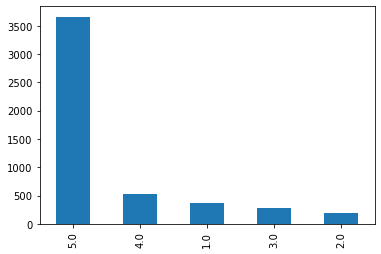

In [43]:
df.rating.value_counts().plot(kind='bar')
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 998687
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  5000 non-null   object 
 1   Movie    5000 non-null   object 
 2   rating   5000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 156.2+ KB


In [45]:
df.isnull().sum()

user_id    0
Movie      0
rating     0
dtype: int64

## Data Processing

In [46]:
from surprise import Reader, Dataset
reader = Reader(rating_scale = (1.0, 5.0))
df_surprise = Dataset.load_from_df(df[['user_id','Movie', 'rating']], reader)

## Model Training

In [47]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(df_surprise, test_size=0.25)

#### What is SVD?

SVD stands for Singular Vector Decomposition

SVD decomposes M (m×n matrix) into 3 parts: UΣV∗
1. U is a matrix of size m×m
2. Σ is a diagonal matrix whose
3. diagonal entries are known as the singular values
4. V is a matrix of size n×n

What are the usage?





In [48]:
from surprise import SVD, accuracy
from surprise.model_selection import cross_validate

algo = SVD(n_epochs = 20, n_factors = 50, verbose = True)
algo.fit(trainset)

cross_validate(algo, df_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing

In [49]:
predictions = algo.test(testset)

## Model Evaluation

In [50]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.7343


0.73426466852384

## Model Deployment

__1. User-based filtering__
these systems recommend products to a user that similar users have liked. For example, let's say Alice and Bob have a similar interest in books (that is, they largely like and dislike the same books). Now, let's say a new book has been launched into the market, and Alice has read and loved it. It is, therefore, highly likely that Bob will like it too, and therefore, the system recommends this book to Bob.

__2. Item-based filtering__
these systems are extremely similar to the content recommendation engine. These systems identify similar items based on how people have rated it in the past. For example, if Alice, Bob, and Eve have given 5 stars to The Lord of the Rings and The Hobbit, the system identifies the items as similar. Therefore, if someone buys The Lord of the Rings, the system also recommends The Hobbit to him or her.

In [51]:
testset[0]

('A2AKR3QR28W09U', 'Movie189', 5.0)

In [52]:
predicted_rating = algo.predict(testset[0][0], str(testset[0][1]))
predicted_rating

Prediction(uid='A2AKR3QR28W09U', iid='Movie189', r_ui=None, est=4.7753188312692325, details={'was_impossible': False})

In [53]:
recommendations = [pred for pred in predictions if pred[1] == "Movie5"]

In [54]:
recommendations

[Prediction(uid='A39ZX6X5H2N4TS', iid='Movie5', r_ui=5.0, est=4.451161547780186, details={'was_impossible': False}),
 Prediction(uid='A3LI15T4YR5WD6', iid='Movie5', r_ui=5.0, est=4.298737099925629, details={'was_impossible': False}),
 Prediction(uid='A1R2XZWQ6NM5M1', iid='Movie5', r_ui=5.0, est=4.298737099925629, details={'was_impossible': False}),
 Prediction(uid='A30WLYNJA3B17H', iid='Movie5', r_ui=5.0, est=4.360134553488322, details={'was_impossible': False}),
 Prediction(uid='ASB0E2O2FLNA7', iid='Movie5', r_ui=5.0, est=4.512716690706267, details={'was_impossible': False})]

### How to intepret the result?
- UID: user-id
- iid: item id
- Rui: the rating given by the user
- est: rating estimated by the model
- Iu: No of items rated by the user
- UI: number of users that have rated this item
- err: abs difference between predicted rating and the actual rating.

In [56]:
predictions

[Prediction(uid='A2AKR3QR28W09U', iid='Movie189', r_ui=5.0, est=4.7753188312692325, details={'was_impossible': False}),
 Prediction(uid='A3R19BJI6JZ93Q', iid='Movie42', r_ui=5.0, est=4.563996199198918, details={'was_impossible': False}),
 Prediction(uid='A228JH8V9Y700G', iid='Movie127', r_ui=5.0, est=4.182267356364661, details={'was_impossible': False}),
 Prediction(uid='AIFXFHO2N9WJB', iid='Movie127', r_ui=5.0, est=4.182267356364661, details={'was_impossible': False}),
 Prediction(uid='A1QV5SS1CZCZ0J', iid='Movie140', r_ui=5.0, est=4.8561309096781065, details={'was_impossible': False}),
 Prediction(uid='A20JXVI9DEKTEI', iid='Movie127', r_ui=5.0, est=4.482749880608113, details={'was_impossible': False}),
 Prediction(uid='A23KCDIR2JWTWS', iid='Movie140', r_ui=5.0, est=4.962083706405709, details={'was_impossible': False}),
 Prediction(uid='A2OHY2ZPWUX1XR', iid='Movie16', r_ui=5.0, est=4.91982067275846, details={'was_impossible': False}),
 Prediction(uid='ADVVG7VDYA6HD', iid='Movie103', r

In [131]:
def get_recommendation(id):
    # get the list of the movie ids
    unique_ids = df['Movie'].unique()
    # get the list of the ids that the userid 13618 has watched
    iids1001 = df.loc[df['user_id']==id, 'Movie']
    print ("User " + id + " has watched " + ", ".join(iids1001.values))
    # remove the rated movies for the recommendations
    movies_to_predict = np.setdiff1d(unique_ids,iids1001)
    
    my_recs = []
    for iid in movies_to_predict:
        my_recs.append((iid, algo.predict(uid=id,iid=iid).est))
    recommend = pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(5)
    print("Top 5 recommendation for user " + id + " is " + ", ".join(recommend['iid'].values))

In [133]:
uid='A3NQU1649SH0Q4'
get_recommendation(uid)

User A3NQU1649SH0Q4 has watched Movie127
Top 5 recommendation for user A3NQU1649SH0Q4 is Movie196, Movie92, Movie182, Movie162, Movie29
